# **Predicting Heart Disease using Machine Learning**

**This notebook works out ways to classify whether a person has a heart related disease or not using Python-based machine learing and Data Science**


**This will be the approach towards the project:**
1. Problem Definition
2. Data 
3. Evaluation 
4. Features 
5. Model Training 
6. Experimentation using the trained model

## **1. Problem Definition :**

> #### *Given clinical parameters about a patient, is it possible to predict whether the patient has a heart related disease or not?*

## **2. Data :**

>**The original data is from Cleveland, Hungary, Switzerland, and the VA Long Beach from the UCI Machine Learning Library : https://archive.ics.uci.edu/dataset/45/heart+disease**
>
>**The actual data file to be used is present on Kaggle : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data**

## **3. Evaluation**

>**The project will be evaluated and modelled in a way that it will have a minimum prediction accuracy of 95%.**

## **4. Features**

**Information about each `Feature` is present below :**


1. **age** - Age in years

2. **sex** - (1 = male; 0 = female)

3. **cp** - Chest pain type:
   - 0: Typical angina - chest pain related to a decrease in blood supply to the heart
   - 1: Atypical angina - chest pain not related to the heart
   - 2: Non-anginal pain - typically esophageal spasms (non-heart related)
   - 3: Asymptomatic - chest pain not showing signs of disease

4. **trestbps** - Resting blood pressure (in mm Hg on admission to the hospital)
   - Anything above 130-140 is typically cause for concern

5. **chol** - Serum cholesterol in mg/dl:
   - Serum = LDL + HDL + 0.2 * triglycerides
   - Levels above 200 are cause for concern

6. **fbs** - Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
   - '>126 mg/dL' signals diabetes

7. **restecg** - Resting electrocardiographic results:
   - 0: Nothing to note
   - 1: ST-T Wave abnormality (can range from mild symptoms to severe problems; signals non-normal heartbeat)
   - 2: Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber)

8. **thalach** - Maximum heart rate achieved

9. **exang** - Exercise induced angina (1 = yes; 0 = no)

10. **oldpeak** - ST depression induced by exercise relative to rest:
    - Looks at the stress on the heart during exercise
    - An unhealthy heart will stress more

11. **slope** - The slope of the peak exercise ST segment:
    - 0: Upsloping - better heart rate with exercise (uncommon)
    - 1: Flatsloping - minimal change (typical healthy heart)
    - 2: Downsloping - signs of an unhealthy heart

12. **ca** - Number of major vessels (0-3) colored by fluoroscopy:
    - Colored vessel means the doctor can see blood passing through
    - More blood movement = better (no clots)

13. **thal** - Thalium stress test result:
    - 1, 3: Normal
    - 6: Fixed defect - used to have a defect but is okay now
    - 7: Reversible defect - no proper blood movement when exercising

14. **target** - Presence of heart disease (1 = yes; 0 = no)


## **Preparing the tools**

**The libraries used in this project are : Seaborn, Matplotlib, Numpy and Pandas for data preprocessing**

In [113]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

## **Load Data**

In [114]:
df = pd.read_csv('/media/smayan/ohio/Milestone Project 1/Data/heart-disease.csv')
df.shape

(303, 14)

### **Exploratory Data Analysis (EDA)**

**The dataset will be explored to find the meaning, relations, incompleteness and reliability of all the features present in the dataset.**

In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

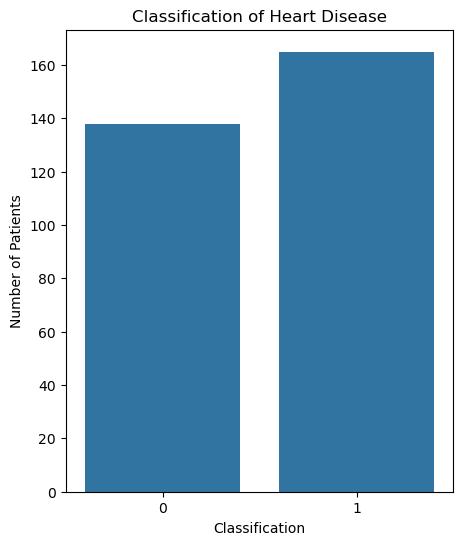

In [117]:
fig, ax = plt.subplots(figsize = (5,6))
sns.barplot(df['target'].value_counts())
plt.xlabel('Classification')
plt.ylabel('Number of Patients')
plt.title('Classification of Heart Disease')
plt.show()


**There are relatively similar amount of values in both classes, so this will be a balanced classification.**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [119]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [120]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [121]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [122]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


In [123]:
men_percentage = (93 / (114 + 93)) * 100
women_percentage = (72 / (24+72)) * 100
print(men_percentage)
print(women_percentage)

44.927536231884055
75.0


**This shows that the percentage of Heart Disease being present in Men is 44.9275% but is 75% for women.**

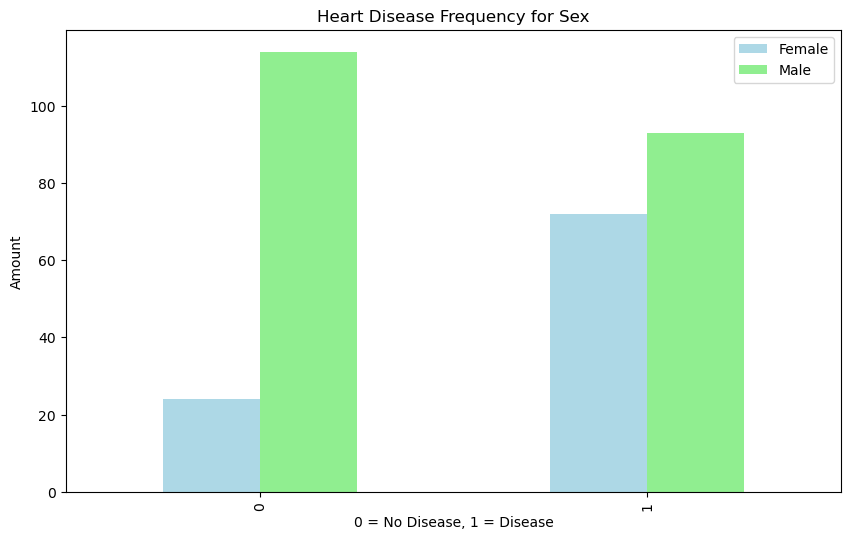

In [124]:
pd.crosstab(df['target'], df['sex']).plot(kind="bar", figsize=(10,6), color=["lightblue", "lightgreen"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.show()

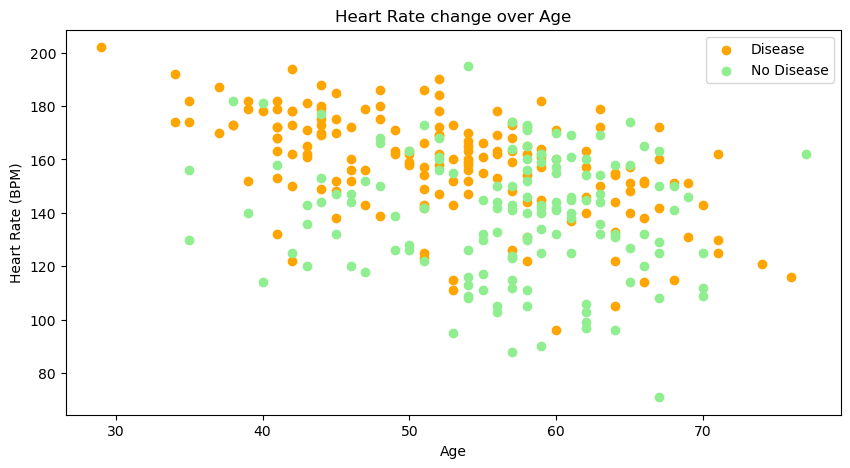

In [125]:
plt.figure(figsize = (10,5))
plt.scatter(df['age'][df['target']==1], df['thalach'][df['target']==1], c = 'orange')
plt.scatter(df['age'][df['target']==0], df['thalach'][df['target']==0], c = 'lightgreen')
plt.xlabel('Age')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate change over Age')
plt.legend(['Disease', 'No Disease'])
plt.show();

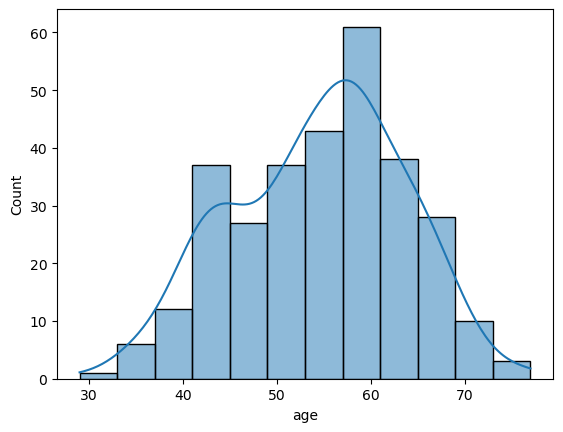

In [126]:
sns.histplot(df['age'], kde = True)
plt.show();

**The distribution of ages is similar to the Bell curve/Normal Distribution/Gaussian Distribution.**

## **Visualizing Correlations in the features of the dataset using a Correlation Heatmap:**

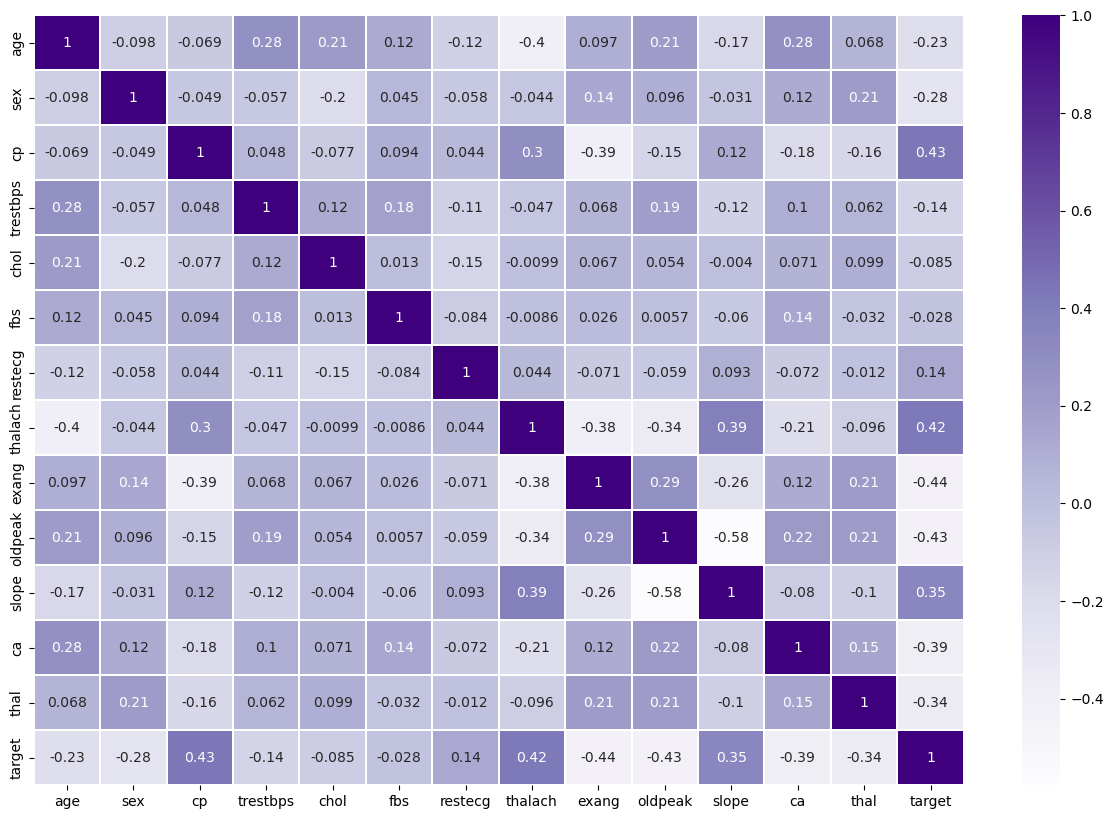

In [127]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cmap = 'Purples', linewidths=0.3)
plt.show()

## **5. Choosing a Model and Training it for prediction**

### **The models which will be tried and evaluated are:**
1. **Linear SVC**
2. **Logistic Regression.**
3. **K-Nearest Neightbours**
4. **Random Forest Classifier**

In [128]:
X = df.drop('target', axis=1)
y = df['target']

### **Now we split our data into a train and test split**

**The reason we do this is because we can find the accuracy better when we test the data based on entities it has not seen before, i.e. entities which were not present in the data on which the model was trained**

**Here the training data will be 80% of the total data and testing data will be 20%**

In [129]:
np.random.seed(42)  #To maintain consistency in the split sets.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [130]:
len(X_train), len(y_train)

(242, 242)

#### **Defining a function to fit and evaluate the models at once**

In [131]:
models = {"Linear SVC" : LinearSVC(), 
           "Logistic Regression" : LogisticRegression(n_jobs=-1),
           "K-Nearest Neighbours" : KNeighborsClassifier(n_jobs=-1,n_neighbors=3 ),
           "Random Forest Classifier" : RandomForestClassifier(n_jobs=-1,n_estimators=1000)}

def fit_evaluate(models, X_trainf = X_train,X_testf = X_test,y_trainf =y_train ,y_testf=y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : targets for training data
    y_test : targets for test data
    """ 
    np.random.seed(42)
    models_score={}
    
    for name, model in models.items():
        model.fit(X_trainf,y_trainf)
        models_score[name] = model.score(X_testf,y_testf)
    
    return models_score


In [132]:
model_scores = fit_evaluate(models)
print(model_scores)

/media/smayan/ohio/conda env/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear SVC': 0.8688524590163934, 'Logistic Regression': 0.8852459016393442, 'K-Nearest Neighbours': 0.6557377049180327, 'Random Forest Classifier': 0.8688524590163934}


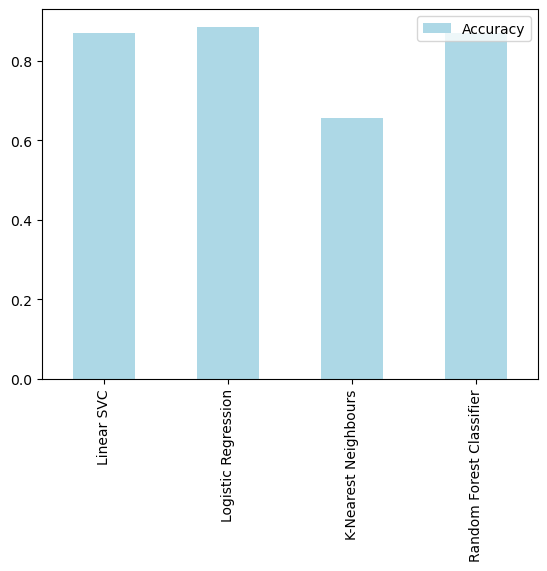

In [139]:
compare = pd.DataFrame(model_scores, index=["Accuracy"])
compare.T.plot.bar(color='lightblue');
plt.xticks = 902
plt.show();

### **This might make Logistic Regression look like the best option but there are more evaluation metrics to consider before finalizing on the model.**

#### **Metrics to be considered :**
* Hyperparameter Tuning
* Feature importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report*. ROC Curve
* Area under ROC curve

### **Hyperparameter Tuning:**

##### **K-Nearest Neighbors Tuning**

In [143]:
train_scores = []
test_scores = []
knn = KNeighborsClassifier()
neighbors = range(1, 21) 

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [144]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 0.75410


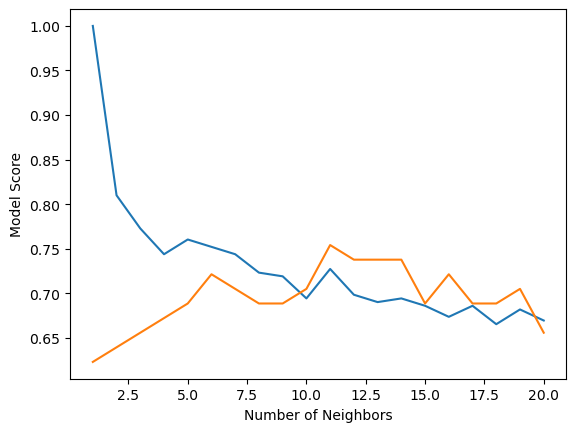

In [160]:
print(f"Maximum KNN score on the test data: {max(test_scores):.5f}")
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores,label="Test Score")
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.show();